In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
import plotly.express as px
from sklearn.decomposition import PCA

# For working with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip3 install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 125 kB/s 


In [3]:
cd gdrive/MyDrive/Colab\ Notebooks/'Deep learning'/Spotify_Popularity_Predictor

/content/gdrive/MyDrive/Colab Notebooks/Deep learning/Spotify_Popularity_Predictor


## Auxiliary functions

In [4]:
def reduce_dimensionality(dataset, n_dimensions):
  """Reduces the size of the dataset to a given parameter"""
  pca = PCA(n_components=n_dimensions)
  return pca.fit_transform(dataset)

def generate_dataset(train_size, val_size):
  df = pd.read_csv('data/musical_data.csv')
  df = df.dropna(subset=['hotttness'])
  scaler = StandardScaler()
  y = df['hotttness'].to_numpy()
  df.drop('hotttness', axis = 1, inplace=True)
  x = scaler.fit_transform(df)
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = train_size, shuffle = True)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 1 - val_size, shuffle = True)
  return x_train, y_train, x_test, y_test, x_val, y_val

# Lyrics Data

In [5]:
df = pd.read_csv('data/lyrics_data.csv')

,artist,title,hotttness,2,3,4,5,6,7,8,...,760,761,762,763,764,765,766,767,768,769
0,Casual,I Didn't Mean To,0.401998,0.041030,-0.032568,-0.006083,0.011386,-0.037333,0.040076,0.007550,...,-0.075478,0.039197,0.010253,-0.013412,-0.026989,-0.030245,-0.045915,0.007981,0.001098,0.009372
1,The Box Tops,Soul Deep,0.417500,-0.024370,0.019561,-0.008222,0.017808,-0.017480,0.019847,-0.047394,...,-0.067382,-0.025436,0.013025,0.044397,-0.013904,-0.019875,-0.029738,0.005403,-0.043602,-0.034822
2,Sonora Santanera,Amor De Cabaret,0.343428,0.046377,0.031706,-0.008457,-0.016585,-0.001444,0.024292,-0.057184,...,-0.054779,-0.023717,0.037238,-0.010993,-0.027019,-0.057467,-0.032323,-0.038755,0.014655,-0.036160
3,Adam Ant,Something Girls,0.454231,0.092272,0.033122,0.010838,-0.014036,0.009196,0.014090,-0.018093,...,-0.014824,-0.035112,0.061509,0.008743,-0.017199,0.045873,-0.048455,-0.036392,0.005466,-0.029896
4,Gob,Face the Ashes,0.401724,0.035047,-0.000346,0.020675,-0.031480,-0.044444,-0.001006,0.007435,...,-0.012775,-0.060393,0.026054,0.027525,-0.022010,-0.019253,-0.047211,0.026378,-0.068835,0.027279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,Joe Bonamassa,I Know A Place,0.511054,0.056641,0.025411,-0.013841,-0.039155,0.002691,-0.026516,0.047544,...,-0.026322,-0.040308,0.054960,-0.040146,0.004249,-0.044772,-0.068147,-0.001179,0.036041,-0.007884
5617,Asleep At The Wheel,The Letter That Johnny Walker Read,0.461023,0.038654,0.008329,0.023079,0.024216,-0.050374,0.016423,-0.045933,...,-0.044681,0.035133,0.014590,-0.032593,-0.012864,-0.105907,-0.021953,-0.046409,-0.005856,0.000946
5618,Bad Company,Crazy Circles,0.482100,0.026210,0.007493,-0.011828,-0.016728,-0.032694,0.035587,-0.058094,...,-0.042067,-0.027865,-0.049805,0.010239,-0.036791,0.034659,-0.076581,0.005752,0.015572,-0.015343
5619,Phantom Planet,The Meantime,0.542395,-0.026034,0.009103,-0.006875,-0.013551,-0.025452,0.033421,-0.031710,...,-0.011429,-0.020353,0.080892,-0.019973,-0.039939,0.061366,-0.070103,-0.014310,-0.011345,-0.043869


#### 2d representation

In [ ]:
coors = reduce_dimensionality(df[df.columns[2:]], 2) 

aux = pd.DataFrame({
    'title': df.title,
    'artist': df.artist,
    'hotttness': df.hotttness,
    'x': coors[:, 0],
    'y': coors[:, 1], 
})

fig = px.scatter(aux, x='x', y='y', color='hotttness')
fig.update_traces(marker=dict(size=5))
fig['layout']['title'] = '2D representation of the lyrics dataset'
fig.write_image('images/lyrics_dataset2D.png', scale=3, width = 1000, height = 480)
fig.show()

#### 3D representation

In [ ]:
coors = reduce_dimensionality(df[df.columns[2:]], 3)

aux = pd.DataFrame({
    'title': df.title,
    'artist': df.artist,
    'hotttness': df.hotttness,
    'x': coors[:, 0],
    'y': coors[:, 1], 
    'z': coors[:, 2] 
})

fig = px.scatter_3d(aux, x='x', y='y', z='z', color = 'hotttness')
fig.update_traces(marker=dict(size=3,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig['layout']['title'] = '3D representation of the lyrics dataset'
fig.write_image('images/lyrics_dataset3D.png', scale=3, width = 1000, height = 480)
fig.show()

In [ ]:
def lyrics_data(train_size, val_size):
  # Read data and drop empty target labels
  df = pd.read_csv('data/lyrics_data.csv')
  df = df.dropna(subset=['hotttness'])

  # Dimensionality reduction to 100 coordinates -> optimum point
  pca = PCA(n_components=100)
  coors = pca.fit_transform(df[df.columns[2:]])

  # Target definition
  y = df['hotttness'].to_numpy()

  # Train-Test-Val split
  x_train, x_test, y_train, y_test = train_test_split(coors, y, train_size = train_size, shuffle = True)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 1 - val_size, shuffle = True)
  return x_train, y_train, x_test, y_test, x_val, y_val

x_train, y_train, x_test, y_test, x_val, y_val = lyrics_data(0.8, 0.1)

In [ ]:
x_.shape

(450, 100)

### Model design and training

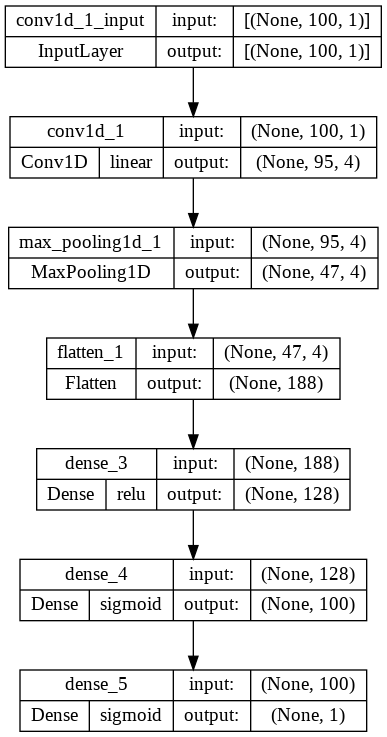

In [ ]:
def generate_model():
  model = Sequential()
  model.add(layers.Conv1D(4, 6, padding='valid', kernel_regularizer='l2', input_shape=(100, 1)))
  model.add(layers.MaxPooling1D(3, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(100, activation ='sigmoid'))
  model.add(layers.Dense(1, activation ='sigmoid'))
  model.compile(optimizer=Adam(),
                loss= 'mse',
                metrics=['mae'])
  return model

model = generate_model()
plot_model(model, show_shapes=True, show_layer_activations=True, to_file='images/lyrics_model.png')

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs = 40, batch_size = 64,
    validation_data=(x_val, y_val)
)

Epoch 1/40
64/64 [==============================] - 1s 9ms/step - loss: 0.0299 - mae: 0.0956 - val_loss: 0.0239 - val_mae: 0.0867
Epoch 2/40
64/64 [==============================] - 0s 6ms/step - loss: 0.0209 - mae: 0.0819 - val_loss: 0.0162 - val_mae: 0.0733
Epoch 3/40
64/64 [==============================] - 0s 6ms/step - loss: 0.0145 - mae: 0.0694 - val_loss: 0.0119 - val_mae: 0.0646
Epoch 4/40
64/64 [==============================] - 0s 6ms/step - loss: 0.0110 - mae: 0.0624 - val_loss: 0.0094 - val_mae: 0.0594
Epoch 5/40
64/64 [==============================] - 0s 6ms/step - loss: 0.0091 - mae: 0.0585 - val_loss: 0.0078 - val_mae: 0.0563
Epoch 6/40
64/64 [==============================] - 0s 6ms/step - loss: 0.0078 - mae: 0.0563 - val_loss: 0.0070 - val_mae: 0.0556
Epoch 7/40
64/64 [==============================] - 0s 6ms/step - loss: 0.0069 - mae: 0.0550 - val_loss: 0.0063 - val_mae: 0.0535
Epoch 8/40
64/64 [==============================] - 0s 6ms/step - loss: 0.0062 - mae: 0.05

Plot and save training curves

In [ ]:
# Convert the history into a df to plot it
name = 'general_model'

history = history.history
df = pd.DataFrame({'mse': history['loss'],  'mae': history['mae'], 'val_mse': history['val_loss'], 'val_mae': history['val_mae']})
df.index += 1
df.index.name = 'Epochs'

# Plot the accuracy of Training and Validation
fig = px.line(df, x=df.index, y=df['mae'])
fig.add_scatter(x=df.index, y=df['val_mae'], mode='lines')
fig['data'][0].showlegend = True  
fig['data'][0]['name'] = 'Training MAE'
fig['data'][1].showlegend = True
fig['data'][1]['name'] = 'Validation MAE'
fig['layout']['title'] = 'MAE evolution'
fig.write_image('images/%s_MAE.png'%name, scale = 10, width = 1400, height = 480)
fig.show()

# Plot the loss of Training and Validation
fig = px.line(df, x=df.index, y=df['mse'])
fig.add_scatter(x=df.index, y=df['val_mse'], mode='lines')
fig['data'][0].showlegend = True
fig['data'][0]['name'] = 'Training mse'
fig['data'][1].showlegend = True#
fig['data'][1]['name'] = 'Validation mse'
fig['layout']['title'] = 'MSE evolution'
fig.write_image('images/%s_MSE.png'%name, scale = 10, width = 1400, height = 480)
fig.show()

NameError: ignored

Save model

In [ ]:
model.save('models/lyrics_model.h5')

### Test and results analysis

In [ ]:
model.evaluate(x_test, y_test)

36/36 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0416


[0.0031213306356221437, 0.041581157594919205]

In [ ]:
# Predictions
y_pred = model.predict(x_test)

# test dataset plot preparation
coors = reduce_dimensionality(x_test, 3)

# Error difference calculation
abs_difference = []
diff = []
for i in range(len(y_test)):
  abs_difference.append(abs(y_pred[i][0] - y_test[i]))
  diff.append(y_pred[i][0] - y_test[i])

aux = pd.DataFrame({
      'x': coors[:, 0],
      'y': coors[:, 1], 
      'z': coors[:, 2],
      'y_pred': y_pred.reshape(1, -1)[0],
      'y_test': y_test,
      'diff': diff,
      'abs_diff': abs_difference
  })

36/36 [==============================] - 0s 4ms/step


In [ ]:
aux.head()

,x,y,z,y_pred,y_test,diff,abs_diff
0,0.060779,-0.194645,-0.169673,0.543864,0.501361,0.042504,0.042504
1,-0.273772,0.143843,-0.043807,0.513251,0.521727,-0.008475,0.008475
2,-0.073064,-0.038366,-0.051348,0.481155,0.536220,-0.055065,0.055065
3,0.099325,0.007867,0.131860,0.473971,0.487596,-0.013625,0.013625
4,-0.237890,-0.090461,-0.001923,0.622155,0.589856,0.032299,0.032299


In [ ]:
# Plot
fig = px.scatter_3d(aux, x='x', y='y', z='z', color = 'abs_diff')
fig.update_traces(marker=dict(size=3,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig['layout']['title'] = 'Absolute error plot of the test phase'
fig.show()

In [ ]:
# Plot
fig = px.scatter_3d(aux, x='x', y='y', z='z', color = 'diff')
fig.update_traces(marker=dict(size=3,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig['layout']['title'] = 'Error plot of the test phase'
fig.show()

In [ ]:
aux['diff'].describe()

count    1125.000000
mean        0.014121
std         0.050517
min        -0.203806
25%        -0.017365
50%         0.016161
75%         0.046874
max         0.206236
Name: diff, dtype: float64

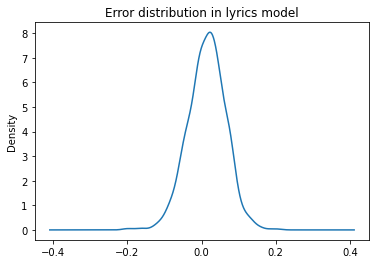

In [ ]:
aux['diff'].plot.kde(title='Error distribution in lyrics model').figure.savefig('images/lyrics_dataset_error_distribution.png')

In [ ]:
print(aux[aux['diff'] > 0.15])
print(aux[aux['diff'] < -0.15])

             x         y         z    y_pred    y_test      diff  abs_diff
89   -0.051480 -0.005615  0.168493  0.488095  0.301247  0.186848  0.186848
347  -0.250690 -0.062309  0.125941  0.451712  0.291452  0.160261  0.160261
471   0.324221  0.526966 -0.096044  0.158214  0.000000  0.158214  0.158214
775  -0.319260  0.396587  0.104114  0.206236  0.000000  0.206236  0.206236
1081 -0.148514  0.103754 -0.022522  0.528434  0.374530  0.153904  0.153904
            x         y         z    y_pred    y_test      diff  abs_diff
298  0.066486 -0.105494  0.318391  0.597554  0.791143 -0.193589  0.193589
310 -0.106967 -0.329660 -0.218706  0.915782  1.082503 -0.166721  0.166721
369  0.062155  0.328217 -0.208779  0.405456  0.609262 -0.203806  0.203806
860 -0.011158  0.025900 -0.159262  0.431790  0.598459 -0.166669  0.166669
